## Import Libraries

In [319]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

%matplotlib inline

## Load the Data

In [320]:
df = pd.read_csv("test.csv")

In [321]:
df.shape

(497, 33)

In [322]:
df.head(2)

,Unnamed: 0,Parking,Swimming Pool,Restaurant,Room Service,Fitness Centre,Spa & Wellness Centre,Business Centre,Facilities for Disabled,Airport Shuttle,...,Highspeed Internet,Airconditioning,Safe/Vault,Tennis Court,Indoor Pool,Pet-friendly,Casino,Golfcourse,Beach Access,Ski-In Ski-Out
0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Preprocess the Data

#### 1. Simple EDA + Data Quality checking

In [323]:
# uniqeness
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,Unnamed: 0,Parking,Swimming Pool,Restaurant,Room Service,Fitness Centre,Spa & Wellness Centre,Business Centre,Facilities for Disabled,Airport Shuttle,...,Highspeed Internet,Airconditioning,Safe/Vault,Tennis Court,Indoor Pool,Pet-friendly,Casino,Golfcourse,Beach Access,Ski-In Ski-Out


In [324]:
# Completeness
df.isnull().sum()

Unnamed: 0                    0
Parking                       0
Swimming Pool                 0
Restaurant                    0
Room Service                  0
Fitness Centre                0
Spa & Wellness Centre         0
Business Centre               0
Facilities for Disabled       0
Airport Shuttle               0
Non-smoking Rooms             0
Babysitting/Child Services    0
Meeting/Banquet Facilities    0
Car Rental                    0
Breakfast Buffet              0
Bar/Lounge                    0
Kids Activities               0
Game Room                     0
Dry Cleaning                  0
Valet Parking                 0
name                          0
rate                          0
review                        0
Highspeed Internet            0
Airconditioning               0
Safe/Vault                    0
Tennis Court                  0
Indoor Pool                   0
Pet-friendly                  0
Casino                        0
Golfcourse                    0
Beach Ac

In [325]:
# Accurecy types
df.dtypes

Unnamed: 0                      int64
Parking                       float64
Swimming Pool                 float64
Restaurant                    float64
Room Service                  float64
Fitness Centre                float64
Spa & Wellness Centre         float64
Business Centre               float64
Facilities for Disabled       float64
Airport Shuttle               float64
Non-smoking Rooms             float64
Babysitting/Child Services    float64
Meeting/Banquet Facilities    float64
Car Rental                    float64
Breakfast Buffet              float64
Bar/Lounge                    float64
Kids Activities               float64
Game Room                     float64
Dry Cleaning                  float64
Valet Parking                 float64
name                           object
rate                          float64
review                          int64
Highspeed Internet            float64
Airconditioning               float64
Safe/Vault                    float64
Tennis Court

#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [326]:
numeric_col = [col for col in df.columns if df[col].dtype != 'object']
cate_col = [col for col in df.columns if df[col].dtype == 'object']        

In [327]:
# one hot coding
df = pd.get_dummies(df, columns=cate_col)

In [328]:
df.shape

(497, 274)

In [329]:
df.head(2)

,Unnamed: 0,Parking,Swimming Pool,Restaurant,Room Service,Fitness Centre,Spa & Wellness Centre,Business Centre,Facilities for Disabled,Airport Shuttle,...,name_Tooq Suites,name_Tura Hotel,name_Villa Palma Compound,name_Vivienda Hotel Villas Granada,name_Voyage Hotel,name_Voyage Residence,name_ibis Riyadh Olaya Street,name_msharef almoden hotel,name_silvana aparthotel,name_voco Riyadh An IHG Hotel
0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,True
1,1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [330]:
df.drop(columns="Unnamed: 0" ,inplace = True)

In [331]:
# Calculate the 35th and 75th percentiles of the price
p35 = df['rate'].quantile(0.35)
p75 = df['rate'].quantile(0.75)

# Function to categorize prices
def categorize_price(price):
    if price < p35:
        return 'Low_Rate'
    elif price < p75:
        return 'Good_Rate'
    else:
        return 'Hight_Rate'

# Apply the function to create a new column
df['rate'] = df['rate'].apply(categorize_price)

# df.drop('Rate', axis=1, inplace=True)

# Verify the distribution of the new categories
print(df['rate'].value_counts())

rate
Good_Rate     198
Low_Rate      168
Hight_Rate    131
Name: count, dtype: int64


In [332]:
p35, p75

(np.float64(6.3), np.float64(8.2))

In [333]:
#df['car_price_category'] 

In [334]:
encoder = LabelEncoder()
df['rate'] = encoder.fit_transform(df['rate'])  

#### 3. Feature selection

In [335]:
# sns.heatmap(df.corr(), annot=True);

In [336]:
correlation = df.corr(numeric_only=True)
#print(correlation['Price'].sort_values(ascending=False))
print(correlation['rate'].sort_values(ascending=False))

rate                                   1.000000
name_Amber Hospitality Al Nafel        0.124874
name_Alyaa Home                        0.111577
name_Al Muteb Suites Heritage Hotel    0.111577
name_The O Tower Residence             0.111577
                                         ...   
Airconditioning                       -0.336194
Highspeed Internet                    -0.346129
Airport Shuttle                       -0.351429
Fitness Centre                        -0.375415
Room Service                          -0.474687
Name: rate, Length: 273, dtype: float64


In [337]:
# Set the correlation threshold
threshold = 0.3  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['rate']) > \
threshold]['rate'].index
selected_features

Index(['Swimming Pool', 'Room Service', 'Fitness Centre', 'Airport Shuttle',
       'rate', 'Highspeed Internet', 'Airconditioning'],
      dtype='object')

In [338]:
df = df[selected_features]


#### 4. Prepare train and test data

In [339]:
# Prepare data
X = df.drop(['rate'], axis=1)


# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [340]:
X.shape

(497, 6)

## Buliding the Model

In [341]:
wcss = []
for i in range(1, 20):  # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS


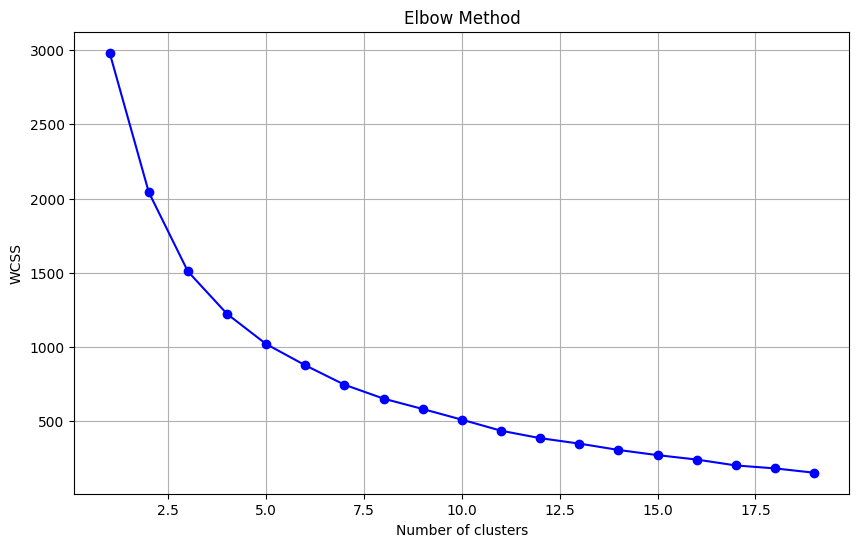

In [342]:
# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss,  marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [343]:
# Optional: Apply k-Means using the optimal number of clusters
optimal_clusters = 5 # This might change based on your actual elbow curve analysis
model = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

## Train and Test the Model

In [344]:
# Fit the model on the training data
y_pred = model.fit_predict(X_scaled)

## Evaluating the Model 

In [345]:
X.head(2)

,Swimming Pool,Room Service,Fitness Centre,Airport Shuttle,Highspeed Internet,Airconditioning
0,1.0,1.0,1.0,1.0,0.0,0.0
1,0.0,1.0,1.0,0.0,1.0,1.0


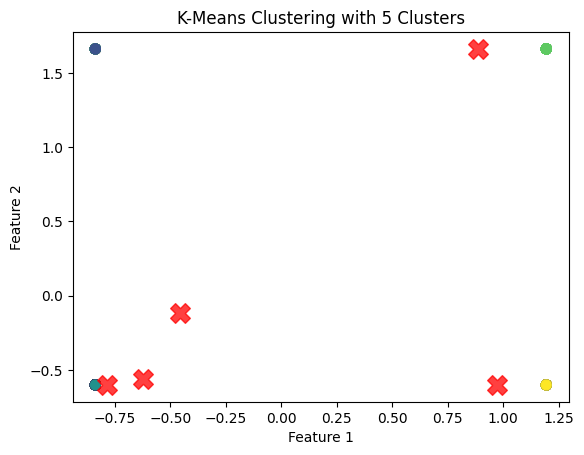

In [346]:
# Plotting the clusters with optimal number
plt.scatter(X_scaled[:, 2], X_scaled[:, 3], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [347]:
X['kmeans'] = y_pred

In [348]:
X['kmeans'].value_counts()

kmeans
1    117
3    105
2    105
4     91
0     79
Name: count, dtype: int64

In [349]:
# sns.scatterplot(data = X , x = 'Parking', y = 'Swimming Pool', hue = 'kmeans')

In [350]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, y_pred)
silhouette_avg

np.float64(0.6073599776923999)

In [351]:
# sns.scatterplot(data = X , x = 'Mileage', y = 'Type_Accent', hue = 'kmeans')

In [352]:
# from sklearn.metrics import silhouette_score
# silhouette_avg = silhouette_score(X, model)
# silhouette_avg